# Quiz 2

### Imports

In [40]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

### Create database

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password=""
)

curr = mydb.cursor()

curr.execute("CREATE DATABASE university")

### Connect to the database

In [97]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="university"
)

curr = mydb.cursor()

### Create students table

In [98]:
curr.reset()
sql = """
CREATE TABLE students (
    id INT AUTO_INCREMENT PRIMARY KEY,
    PersonalNumber INT,
    Monday Float(4, 2),
    Tuesday Float(4, 2),
    Wednesday Float(4, 2),
    Thursday Float(4, 2),
    Friday Float(4, 2),
    Saturday Float(4, 2),
    Sunday Float(4, 2)
)
"""
curr.execute(sql)

### Tasks 2-3

სტუდენტების პირადი ნომრები წარმოადგენს განსხვავებულ შემთხვევი რიცხვებს [100; 999] შუალედიდან

სტუდენტის ერთი დღის განმავლობაში მეცადინეობის დრო, შემთხვევით ათწილადი რიცხვი [0, 5] შუალედში, მძიმის
შემდეგ ორი ციფრით. დააგენერირეთ შვიდი (ერთ კვირის) ჩანაწერი თითეული სტუდენტისთვის. (იმავე ცხრილში)

In [99]:
students = 100
personal_numbers = random.sample(range(100, 1000), students)
mondays = [round(random.uniform(0, 5), 2) for _ in range(students)]
tuesdays = [round(random.uniform(0, 5), 2) for _ in range(students)]
wednesdays = [round(random.uniform(0, 5), 2) for _ in range(students)]
thursdays = [round(random.uniform(0, 5), 2) for _ in range(students)]
fridays = [round(random.uniform(0, 5), 2) for _ in range(students)]
saturdays = [round(random.uniform(0, 5), 2) for _ in range(students)]
sundays = [round(random.uniform(0, 5), 2) for _ in range(students)]

In [100]:
curr.reset()
for i in range(students):
    sql = """INSERT INTO students 
            (PersonalNumber, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday) 
            VALUES(%s, %s, %s, %s, %s, %s, %s, %s)"""
    
    val = (personal_numbers[i], mondays[i], tuesdays[i], wednesdays[i], thursdays[i], fridays[i], saturdays[i], sundays[i])
    curr.execute(sql, val)
    mydb.commit()

### Read data

In [101]:
curr.reset()
sql = "SELECT * FROM students"
curr.execute(sql)
data = curr.fetchall()

In [102]:
student_dict = {}
for s in data:
    student_dict[s[1]] = list(s[2:])

### Task 3
ააგეთ წერტილოვანი დიაგრამა ერთ კვირის განმავლობაში სტუდენტების მიერ მეცადინეობაში დახარჯულ დროსთან
მიმართებაში (დრო დაამრგვალეთ მთელ რიცხვებამდე 0, 1, 2, 3, . . . 12), X ღერძის გასწვრივ სტუდენტები Y ღერძის
გასწვრივ სტუდენტის მიერ კვირაში მეცადინეობაზე დახარჯული დრო.

Text(0, 0.5, 'Student study time in week')

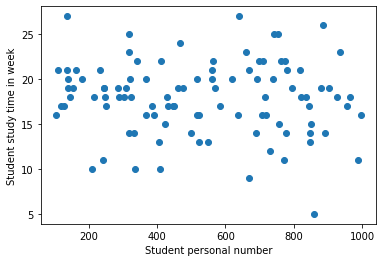

In [103]:
plt.scatter(student_dict.keys(), list(map(lambda s: round(sum(s[1])), student_dict.items())))
plt.xlabel("Student personal number")
plt.ylabel("Student study time in week")

### Task 4
იპოვეთ ყველა სტუდენტისთვის კვირის განმავლობაში დახარჯული საშუალო დრო, სტანდარტული გადახრა,
მინიმალური, მაქსიმალური მაჩვენებელი.

In [104]:
for student, week_study in student_dict.items():
    print(f"student N{student}:")    
    print(f"\tAverage study time: {np.average(week_study)}")
    print(f"\tStudy time std: {np.std(week_study)}")
    print(f"\tMin: {np.min(week_study)}")
    print(f"\tMax: {np.max(week_study)}")


student N302:
	Average study time: 2.6242857142857146
	Study time std: 1.3174960790709576
	Min: 0.78
	Max: 4.55
student N709:
	Average study time: 3.154285714285714
	Study time std: 1.580468801543726
	Min: 0.9
	Max: 4.63
student N340:
	Average study time: 3.125714285714286
	Study time std: 1.1612906261428908
	Min: 0.83
	Max: 4.66
student N287:
	Average study time: 2.6914285714285713
	Study time std: 1.3416559977604283
	Min: 0.8
	Max: 4.75
student N886:
	Average study time: 3.7600000000000002
	Study time std: 1.3882260005386113
	Min: 0.4
	Max: 4.65
student N845:
	Average study time: 2.4571428571428577
	Study time std: 1.4450478418744903
	Min: 0.76
	Max: 4.58
student N707:
	Average study time: 2.22
	Study time std: 1.508537607845994
	Min: 0.67
	Max: 4.63
student N144:
	Average study time: 2.5614285714285714
	Study time std: 1.4307283716587815
	Min: 0.36
	Max: 4.54
student N754:
	Average study time: 3.515714285714286
	Study time std: 1.392026858760349
	Min: 0.26
	Max: 4.71
student N690:
	

### Task 5
გამოთვალეთ 50% პროცენტულო სტუდენტების ყოველ დღიური მეცადინეობისთვის.

In [105]:
study_time_for_weeks = np.array([i for i in student_dict.values()]).T
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for idx, day in enumerate(days):
    print(f"50th percentile for {day} - {np.percentile(study_time_for_weeks[idx], 50)}")

50th percentile for Monday - 2.635
50th percentile for Tuesday - 2.675
50th percentile for Wednesday - 2.965
50th percentile for Thursday - 2.5599999999999996
50th percentile for Friday - 2.54
50th percentile for Saturday - 2.4400000000000004
50th percentile for Sunday - 2.37
